# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [24]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x = x0
    for i in range(maxiter):
        xn = x - f(x)/fder(x)
        if ((xn - x) < eps and (xn - x) > -eps):
            return xn
        x = xn
    return x

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [27]:
res = newton_iteration(lambda x: (x**2 - 1), lambda x: 2*x, 0.1)
print(res)
print(res**2 - 1)

1.0000000000139897
2.7979396577393345e-11


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [30]:
def ni2 (f, fder, m, x0, eps=1e-5, maxiter=1000):
    x = x0
    for i in range(maxiter):
        xn = x - m * f(x)/fder(x)
        if ((xn - x) < eps and (xn - x) > -eps):
            return (xn, i)
        x = xn
    return (x, maxiter)

for i in range(5):
    res, n = ni2(lambda x: ((x**2 - 1)**2), lambda x: (4*x*(x**2 - 1)), i + 1, 0.1)
    print(res)
    print(n)
    
#при m = 2 последовательность действительно сходится быстрее всего

1.000008176516911
19
1.0000000000139897
6
0.9999978368832554
18
0.09999999999999964
1000
-6.394887021961925
1000


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

0.6417095534222992


[0.6        0.64156149 0.64164398 0.64167159 0.64168575 0.64169459
 0.64170311 0.64170469 0.64170756 0.64170794 0.64171105 0.64171253
 0.64171329 0.64171371 0.64171398 0.6417142  0.64171436 0.64171428
 0.64171478 0.64171365]


3.0


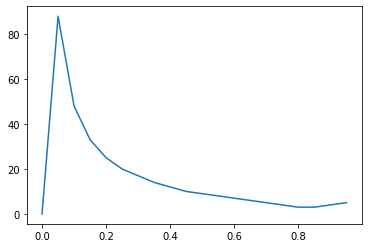

In [41]:
import numpy as np
import matplotlib.pyplot as mpl

def fp1 (x0, eps = 1e-5):
    x = x0
    for i in range(100000):
        xn = (np.cos(x))**2
        if ((xn - x) < eps and (xn - x) > -eps):
            return xn
        x = xn
    return x

def fp2 (x0, a, eps = 1e-5):
    x = x0
    for i in range (100000):
        xn = x - a*(np.sqrt(x) - np.cos(x))
        if ((xn - x) < eps and (xn - x) > -eps):
            return xn, i
        x = xn
    return x, 100000


x = np.arange(0, 1, 1e-5)
alpha = np.arange(0, 1, 0.05)


#mpl.plot(x, np.cos(x), x, np.sqrt(x))
print(fp1(0.6))

res = np.zeros(len(alpha))
n = np.zeros(len(alpha))
for i in range (len(alpha)):
    res[i], n[i] = fp2(0.6, alpha[i])


print("\n")
print(res)
mpl.plot(alpha, n)

print("\n")
print(n[16])

#на графике видно минимум количества итераций до того, как последовательность сходится
#минимальное кол-во итераций - 3
#минимум достигается при альфа = 0.8

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.